DTW Distance between time series 1 and 2: 5.355226423510705


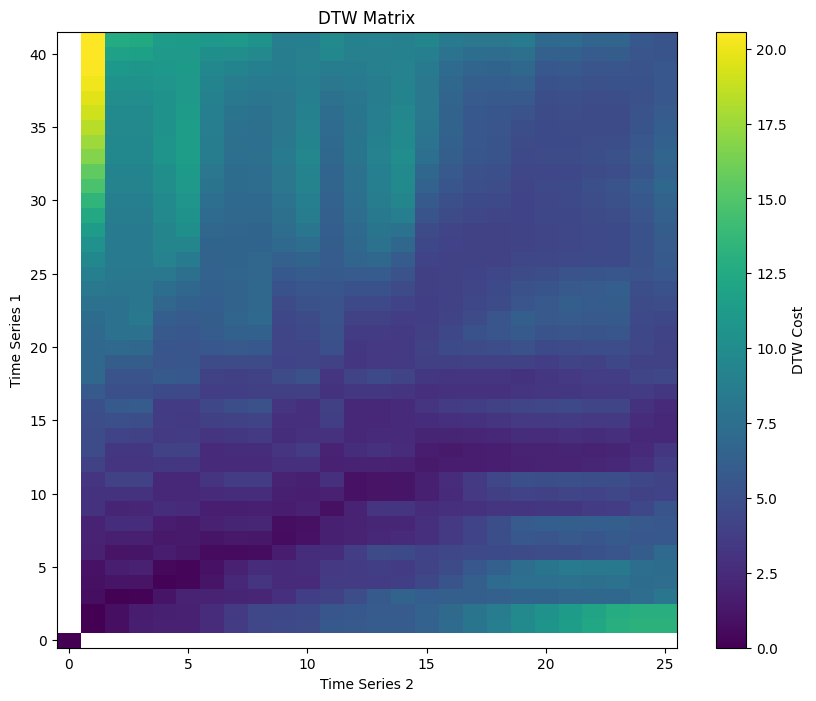

DTW matrix saved to dtw_matrix.csv


In [3]:
import numpy as np
import matplotlib.pyplot as plt

num_series = 20 
lengths = np.random.randint(20, 50, num_series) 
cycle_counts = np.random.randint(2, 8, num_series)  

variable_cycle_time_series = []

for length, cycles in zip(lengths, cycle_counts):
   
    cycle_lengths = np.random.randint(1, int(length / cycles), cycles)
    cycle_lengths = np.append(cycle_lengths, length - sum(cycle_lengths)).clip(min=1)

    series = []
    for cycle_length in cycle_lengths:
        x = np.linspace(0, np.pi, cycle_length) 
        cycle = np.sin(x) + 0.1 * np.random.randn(cycle_length)  
        series.extend(cycle)

    series = np.array(series[:length])
    series[0] = 0
    series[-1] = 0
    variable_cycle_time_series.append(series)


def dtw_distance(ts1, ts2):
    """Calculates the DTW distance and returns the matrix."""
    n, m = len(ts1), len(ts2)
    dtw_matrix = np.zeros((n + 1, m + 1))
    dtw_matrix[0, 1:] = np.inf
    dtw_matrix[1:, 0] = np.inf
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(ts1[i - 1] - ts2[j - 1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i - 1, j], dtw_matrix[i, j - 1], dtw_matrix[i - 1, j - 1])
    return dtw_matrix


if len(variable_cycle_time_series) > 1:
    dtw_matrix = dtw_distance(variable_cycle_time_series[0], variable_cycle_time_series[1])
    distance = dtw_matrix[-1, -1] 
    print(f"DTW Distance between time series 1 and 2: {distance}")

    plt.figure(figsize=(10, 8))
    plt.imshow(dtw_matrix, origin='lower', cmap='viridis', interpolation='nearest', aspect='auto')  
    plt.colorbar(label='DTW Cost')
    plt.title("DTW Matrix")
    plt.xlabel("Time Series 2")
    plt.ylabel("Time Series 1")
    plt.show()

    np.savetxt("dtw_matrix.csv", dtw_matrix, delimiter=",")
    print("DTW matrix saved to dtw_matrix.csv")

else:
    print("Not enough time series to compare")